# Import packages

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4e_fl_fbm_endo_enrichment_20200512.h5ad")

In [4]:
# read in annotation.csv which contains: 'Cluster' column for leiden clusters and 'Category' column for annotations
annotation = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fl_endo_annotation.csv", index_col=False)

In [5]:
# convert the clusters column to a string (so that it can be input into the replace function, which acts on strings)
annotation.Cluster = annotation.Cluster.apply(str)
# make a temp metadata column for new cell labels from the leiden clusters
adata.obs["cell.labels"] = adata.obs["leiden"]

In [6]:
# save the clusters/categories columns as named lists 
clusters = annotation["Cluster"].tolist()
categories = annotation["Category"].tolist()
# replace all values in new.cell.labels column matchin clusters values with categories values
adata.obs["cell.labels"] = adata.obs["cell.labels"].replace(clusters, categories)

... storing 'cell.labels' as categorical


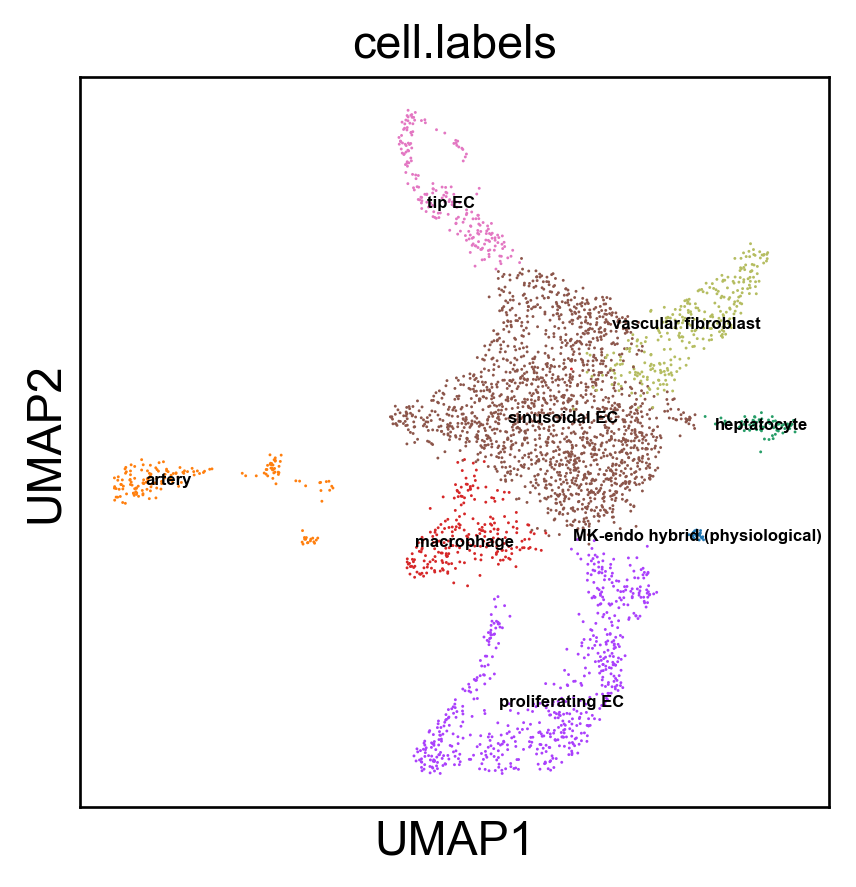

In [7]:
# lets look into proliferation..
sc.pl.umap(adata, color=["cell.labels"], legend_loc="on data", legend_fontsize=5, size=3)

In [8]:
pd.DataFrame(adata.obs["cell.labels"]).to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fl_endo_meta.csv")

# Load sinusoidal endo from FL and FBM

# Import the FBM sinusoidal endo

In [9]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 104652 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [11]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                  327
CD8 T                  171
CD14 monocyte         8787
CD56 bright NK         540
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [12]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [13]:
adata = adata[adata.obs['cell.labels'].isin(['sinusoidal EC'])].copy()

In [14]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
sinusoidal EC    550
dtype: int64

In [15]:
adata.obs["dataset"] = "FBM"

In [16]:
fbm = adata

# Import the FL sinusoidal EC

In [17]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [18]:
adata

AnnData object with n_obs × n_vars = 113063 × 27080 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'cell.labels', 'combined.labels', 'batch', 'sample', 'n_counts'
    obsm: 'X_fdg', 'X_tsne', 'X_umap'

In [19]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [20]:
adata = adata[adata.obs['cell.labels'].isin(['Endothelial cell'])].copy()

In [21]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
Endothelial cell    3348
dtype: int64

In [22]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fl_endo_meta.csv", index_col=0)
adata.obs["sinu_annot"] = annot

In [23]:
cell_numbers = adata.obs.groupby(["sinu_annot"]).apply(len)
cell_numbers

sinu_annot
MK-endo hybrid (physiological)      20
artery                             173
heptatocyte                         68
macrophage                         234
proliferating EC                   617
sinusoidal EC                     1715
tip EC                             209
vascular fibroblast                312
dtype: int64

In [24]:
adata = adata[adata.obs['sinu_annot'].isin(['sinusoidal EC'])].copy()

In [25]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
Endothelial cell    1715
dtype: int64

In [26]:
adata.obs["old_cell.labels"] = adata.obs["cell.labels"]
adata.obs["cell.labels"] = adata.obs['sinu_annot']

In [27]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
sinusoidal EC    1715
dtype: int64

In [28]:
adata.obs["dataset"] = "liver"
liver = adata

# Combine the datasets

In [29]:
liver.X = liver.X.toarray()

In [30]:
from scipy import sparse

objects = [liver, fbm]

for i in objects:
    array_vals = i.X
    i.X = sparse.csr_matrix(i.X)
    i.raw = i
    i.X = array_vals

In [31]:
merged = liver.concatenate(fbm, index_unique=None, join='inner')

In [32]:
merged.shape

(2265, 27079)

In [33]:
cell_numbers = merged.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
sinusoidal EC    2265
dtype: int64

In [34]:
merged.obs["dataset_cell.labels"] = merged.obs["dataset"].astype(str) + '_' + merged.obs["cell.labels"].astype(str)

In [35]:
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
FBM_sinusoidal EC       550
liver_sinusoidal EC    1715
dtype: int64

# Pre-process the data

In [36]:
adata=merged

In [37]:
# normalise count data 
sc.pp.normalize_total(adata)

In [38]:
# log the count data 
sc.pp.log1p(adata)

In [39]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [40]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run the dotplot 

In [41]:
genes = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/sinusoidal_gene_heatmap.csv")
genes = genes["genes"].tolist()

... storing 'AnnatomicalPart' as categorical
... storing 'april_cell.labels' as categorical
... storing 'cell.labels' as categorical
... storing 'combined.labels' as categorical
... storing 'dataset' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'old_cell.labels' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sample' as categorical
... storing 'sample.type' as categorical
... storing 'sequencing.type' as categorical
... storing 'sinu_annot' as categorical
... storing 'sort.ids' as categorical
... storing 'stages' as categorical
... storing 'tissue' as categorical
... storing 'dataset_cell.labels' as categorical


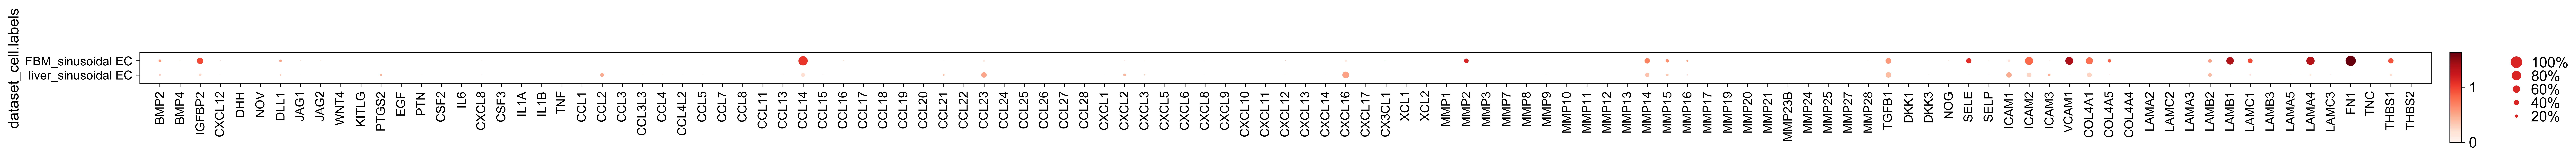

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[39.55, 0, 0.2, 0.5, 0.25])

In [42]:
sc.settings.set_figure_params(dpi=300, dpi_save=1000)
sc.pl.dotplot(adata, var_names=genes, groupby="dataset_cell.labels", use_raw=False, 
              save="figs4e_sinusoidal_EC_fl_fbm_dotplot_20200513.pdf")

In [43]:
sinusoidal_lit_genes=[
#scavengers    
'MSR1',
'STAB1',
'STAB2',
'MRC1',
'FCGR2B',
'CLEC4M',
'LRP1',
'LYVE1',
'CXCL16',
# adhesion
'SELE',
'ICAM1',
'ICAM2',
'ICAM3',
'VCAM1',
'COL4A1',
'LAMB1',
'FN1',
'THBS1',
'MMP2',
'MMP14',
'MMP15',
# angiopoietins
'BMP2',
'BMP4',
'IGFBP2',
'DLL1',
'CXCL12',
'KITLG',
'CCL14',
'CCL23',
'TGFB1']

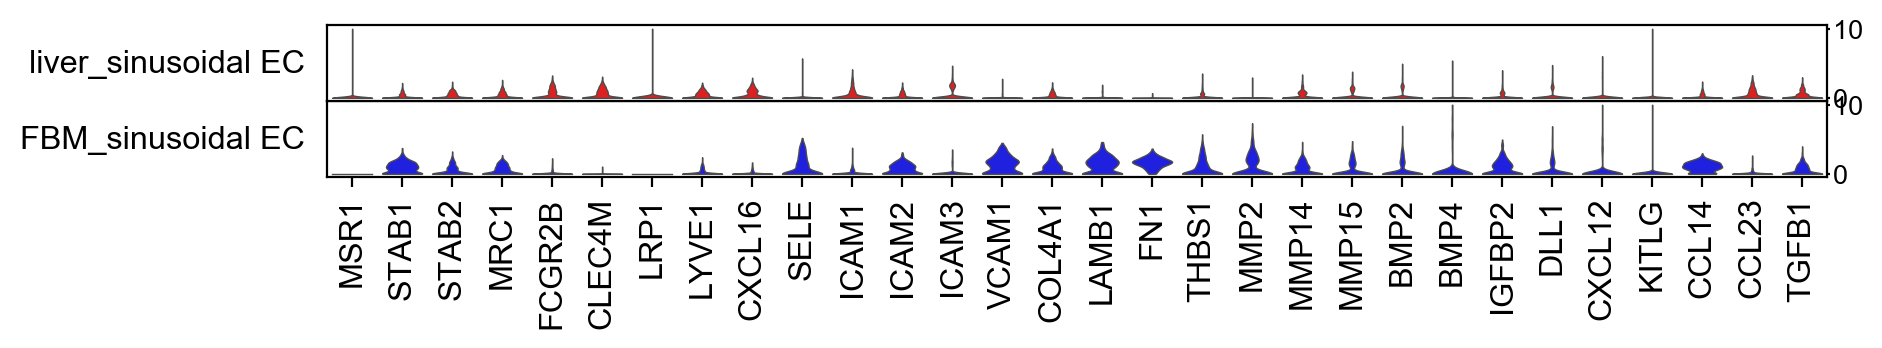

In [44]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories(
    ['liver_sinusoidal EC', 'FBM_sinusoidal EC'])
genes = genes

sc.pl.stacked_violin(adata, var_names=sinusoidal_lit_genes, save="sinusoidal_endo_fl_fbm_violin_20200514.pdf", 
                     rotation=90, 
                     groupby='dataset_cell.labels', use_raw=False, swap_axes=False, figsize=(10,1), 
                     row_palette=["#ff0000", "#0000ff"])

# Save data

In [45]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [46]:
adata.X

<2265x27079 sparse matrix of type '<class 'numpy.float32'>'
	with 5344254 stored elements in Compressed Sparse Row format>

In [47]:
adata.raw.X

<2265x27079 sparse matrix of type '<class 'numpy.float32'>'
	with 6026120 stored elements in Compressed Sparse Row format>

In [48]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4e_fbm_fl_sinusoidal_endo_20200514.h5ad")

# Reload FL metadata for sinusoidal endo and save as csv

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4e_fbm_fl_sinusoidal_endo_20200514.h5ad")

In [4]:
pd.DataFrame(adata.obs).to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fl_endo_meta_20200618.csv")

# Reload FL/FBM sinusoidal endo data, run violin plot and run stats too

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.19.0 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4e_fbm_fl_sinusoidal_endo_20200514.h5ad")

In [4]:
adata.shape

(2265, 27079)

In [5]:
cell_numbers = adata.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
liver_sinusoidal EC    1715
FBM_sinusoidal EC       550
dtype: int64

In [6]:
sinusoidal_lit_genes=[
# adhesion
'SELE',
'ICAM1',
'ICAM2',
'ICAM3',
'VCAM1',
# extracellular matrix
'COL4A1',
'LAMB1',
'FN1',
'THBS1',
'MMP2',
'MMP14',
'MMP15',
# angiopoietins
'BMP2',
'BMP4',
'IGFBP2',
'DLL1',
'CXCL12',
'KITLG',
'CCL14',
'CCL23',
'TGFB1']

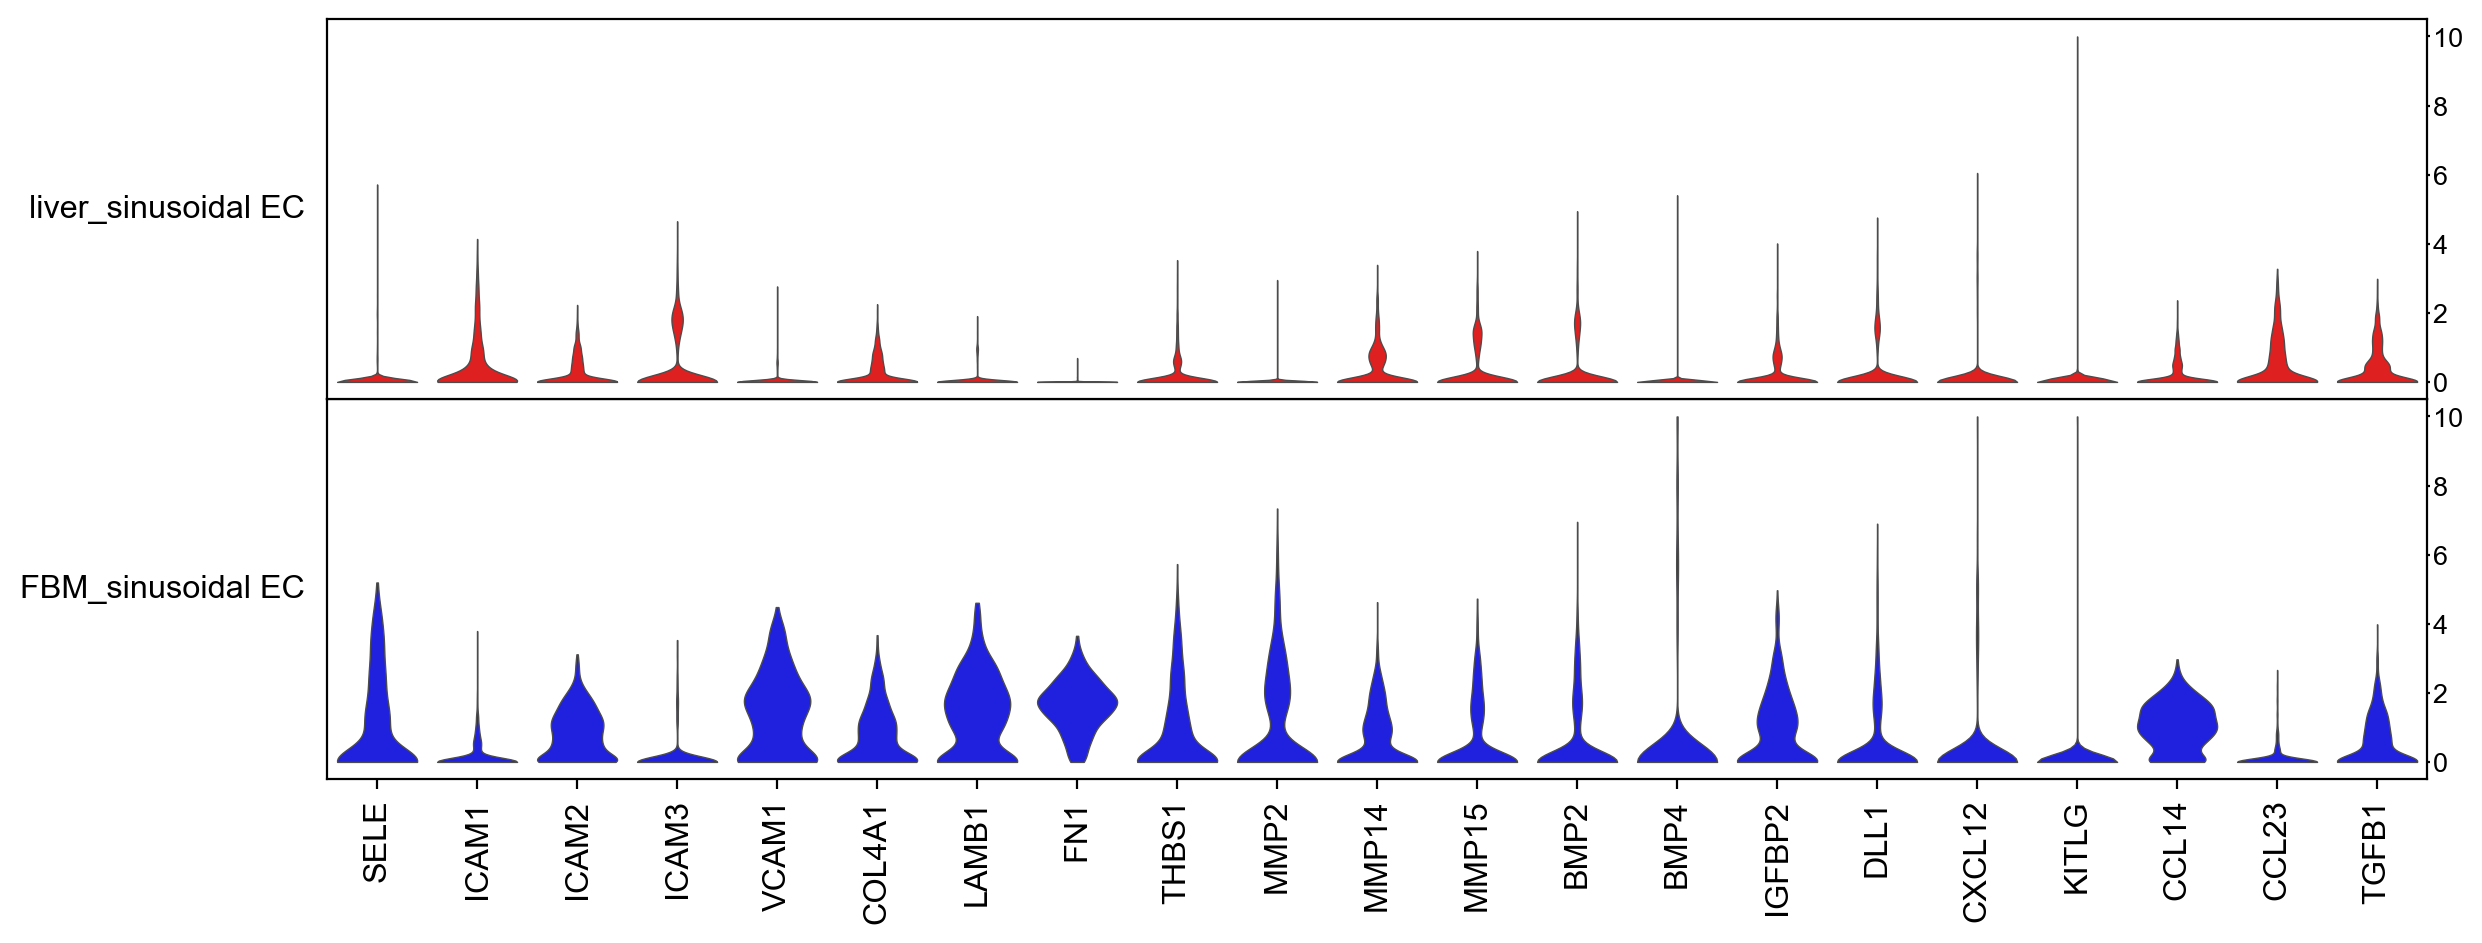

In [7]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories(
    ['liver_sinusoidal EC', 'FBM_sinusoidal EC'])

sc.pl.stacked_violin(adata, var_names=sinusoidal_lit_genes, save="sinusoidal_endo_fl_fbm_violin_20200710.pdf", 
                     rotation=90, 
                     groupby='dataset_cell.labels', use_raw=False, swap_axes=False, figsize=(14,5), 
                     row_palette=["#ff0000", "#0000ff"])

# Run some stats now

In [8]:
subset = adata[:, sinusoidal_lit_genes].copy()

sc.tl.rank_genes_groups(subset, groupby='dataset_cell.labels', method='wilcoxon', use_raw=False, 
                        log_transformed=True, groups=['liver_sinusoidal EC', 'FBM_sinusoidal EC'], n_genes=subset.shape[1])

# save df for filtered degs
result = subset.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs_by_cluster = pd.DataFrame({group + '_' + key[:7]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'pvals', 'pvals_adj']})
# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/fig6b_fbm_fl_sinusoidal_violin_degs_20200710.csv")
degs_by_cluster

,liver_sinusoidal EC_names,liver_sinusoidal EC_logfold,liver_sinusoidal EC_pvals,liver_sinusoidal EC_pvals_a,FBM_sinusoidal EC_names,FBM_sinusoidal EC_logfold,FBM_sinusoidal EC_pvals,FBM_sinusoidal EC_pvals_a
0,CCL23,2.472405,1.569840e-38,3.662959e-38,FN1,9.218721,1.104689e-260,2.319847e-259
1,ICAM1,1.664688,3.550058e-20,6.212601e-20,VCAM1,5.995254,6.222931e-143,6.534077e-142
2,ICAM3,1.830874,5.152266e-09,7.728399e-09,CCL14,2.967206,7.144222e-139,5.000955e-138
3,KITLG,-1.475164,8.615247e-01,8.615247e-01,LAMB1,5.509399,7.844029e-127,4.118115e-126
4,CXCL12,-1.497048,1.578093e-01,1.656998e-01,ICAM2,2.033671,3.930702e-63,1.650895e-62
5,BMP4,-5.937834,7.268676e-03,8.033800e-03,SELE,4.683244,2.517192e-59,8.810173e-59
6,DLL1,-1.052993,2.363129e-03,2.756984e-03,MMP2,7.440579,2.581181e-52,7.743544e-52
7,BMP2,-1.153437,2.718949e-04,3.358701e-04,IGFBP2,2.516280,3.159951e-48,8.294872e-48
8,TGFB1,-0.632336,2.602266e-04,3.358701e-04,COL4A1,1.952300,2.006425e-37,4.213493e-37
9,MMP15,-1.111912,5.278139e-05,7.389394e-05,THBS1,2.655996,1.211412e-32,2.312695e-32
